In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('BTCUSDT_Binance_futures_data_day.csv',skiprows=1)

In [3]:
i=1
data['y1'] = data[['close']].shift(-i)

In [4]:
data['y1'].fillna(method='ffill', inplace=True)

In [5]:
data.date = pd.to_datetime(data.date)

In [6]:
data.set_index('date',inplace= True)

In [7]:
data = data.asfreq('d')

In [8]:
data.drop(columns=['unix','symbol'], inplace=True)

In [15]:
data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1
date,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10391.63
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10391.63
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10307.00
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10102.02
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10159.55
...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,21639.50
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,21820.30
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,22386.00


In [17]:
data['short_mavg'] = data['close'].rolling(window=10, min_periods=1, center=False).mean()

In [18]:
data['long_mavg'] = data['close'].rolling(window=60, min_periods=1, center=False).mean()

In [19]:
data['signal'] = np.where(data['short_mavg'] > data['long_mavg'], 1.0, 0.0)

In [20]:
data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1,short_mavg,long_mavg,signal
date,,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10391.63,10391.630000,10391.630000,0.0
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10391.63,10349.315000,10349.315000,0.0
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10307.00,10266.883333,10266.883333,0.0
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10102.02,10240.050000,10240.050000,0.0
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10159.55,10275.066000,10275.066000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,21639.50,20172.890000,21961.683333,0.0
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,21820.30,20417.390000,21991.806667,0.0
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,22386.00,20451.570000,21980.796667,0.0


In [29]:
MA_50 = data['close'].rolling(window = 50).mean()  
data['MA_50'] = MA_50 
MA_20 = data['close'].rolling(window = 20).mean() 
data['MA_20'] = MA_20 

data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1,short_mavg,long_mavg,signal,MA_50,MA_20
date,,,,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10391.63,10391.630000,10391.630000,0.0,NaN,NaN
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10391.63,10349.315000,10349.315000,0.0,NaN,NaN
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10307.00,10266.883333,10266.883333,0.0,NaN,NaN
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10102.02,10240.050000,10240.050000,0.0,NaN,NaN
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10159.55,10275.066000,10275.066000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,21639.50,20172.890000,21961.683333,0.0,21940.606,20309.650
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,21820.30,20417.390000,21991.806667,0.0,21936.914,20353.040
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,22386.00,20451.570000,21980.796667,0.0,21914.164,20293.420


In [34]:
def get_technical_indicators(data):
    data['ma7'] = data['close'].rolling(window=7).mean()
    data['ma21'] = data['close'].rolling(window=21).mean()
    
    data['26ema'] = data['close'].ewm(span=26).mean()
    data['12ema'] = data['close'].ewm(span=12).mean()
    data['MACD'] = data['12ema']-data['26ema']

    # Create Bollinger Bands
    data['20sd'] = data['close'].rolling(window = 21).std()
    data['upper_band'] = data['ma21'] + (data['20sd']*2)
    data['lower_band'] = data['ma21'] - (data['20sd']*2)
    
    data['ema'] = data['close'].ewm(com=0.5).mean()
    
    data['momentum'] = data['close']-1
    data['log_momentum'] = np.log(data['momentum'])
    return data

In [35]:
data = get_technical_indicators(data)

In [36]:
data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1,short_mavg,long_mavg,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
date,,,,,,,,,,,,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10391.63,10391.630000,10391.630000,...,NaN,10391.630000,10391.630000,0.000000,NaN,NaN,NaN,10391.630000,10390.63,9.248660
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10391.63,10349.315000,10349.315000,...,NaN,10347.687500,10345.788750,-1.898750,NaN,NaN,NaN,10328.157500,10306.00,9.240482
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10307.00,10266.883333,10266.883333,...,NaN,10259.421552,10250.645751,-8.775802,NaN,NaN,NaN,10171.600769,10101.02,9.220392
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10102.02,10240.050000,10240.050000,...,NaN,10231.501831,10221.890382,-9.611449,NaN,NaN,NaN,10163.466500,10158.55,9.226071
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10159.55,10275.066000,10275.066000,...,NaN,10274.085961,10274.392896,0.306935,NaN,NaN,NaN,10331.935455,10414.13,9.250919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,21639.50,20172.890000,21961.683333,...,20360.952381,20847.781435,20541.763163,-306.018271,908.190026,22177.332433,18544.572329,21651.531456,21819.30,9.990550
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,21820.30,20417.390000,21991.806667,...,20408.523810,20961.723551,20825.491907,-136.231643,987.337398,22383.198606,18433.849013,22141.177152,22385.00,10.016146
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,22386.00,20451.570000,21980.796667,...,20343.966667,20902.521806,20723.493152,-179.028654,954.943169,22253.853004,18434.080329,20822.059051,20161.50,9.911530


In [54]:
data['ma21'].fillna(method='bfill', inplace=True)
data['20sd'].fillna(method='bfill', inplace=True)
data['upper_band'].fillna(method='bfill', inplace=True)
data['lower_band'].fillna(method='bfill', inplace=True)
data['MA_50'].fillna(method='bfill', inplace=True)
data['MA_20'].fillna(method='bfill', inplace=True)
data['ma7'].fillna(method='bfill', inplace=True)

In [55]:
data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1,short_mavg,long_mavg,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
date,,,,,,,,,,,,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10391.63,10391.630000,10391.630000,...,9741.419048,10391.630000,10391.630000,0.000000,845.937290,11433.293627,8049.544468,10391.630000,10390.63,9.248660
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10391.63,10349.315000,10349.315000,...,9741.419048,10347.687500,10345.788750,-1.898750,845.937290,11433.293627,8049.544468,10328.157500,10306.00,9.240482
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10307.00,10266.883333,10266.883333,...,9741.419048,10259.421552,10250.645751,-8.775802,845.937290,11433.293627,8049.544468,10171.600769,10101.02,9.220392
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10102.02,10240.050000,10240.050000,...,9741.419048,10231.501831,10221.890382,-9.611449,845.937290,11433.293627,8049.544468,10163.466500,10158.55,9.226071
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10159.55,10275.066000,10275.066000,...,9741.419048,10274.085961,10274.392896,0.306935,845.937290,11433.293627,8049.544468,10331.935455,10414.13,9.250919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,21639.50,20172.890000,21961.683333,...,20360.952381,20847.781435,20541.763163,-306.018271,908.190026,22177.332433,18544.572329,21651.531456,21819.30,9.990550
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,21820.30,20417.390000,21991.806667,...,20408.523810,20961.723551,20825.491907,-136.231643,987.337398,22383.198606,18433.849013,22141.177152,22385.00,10.016146
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,22386.00,20451.570000,21980.796667,...,20343.966667,20902.521806,20723.493152,-179.028654,954.943169,22253.853004,18434.080329,20822.059051,20161.50,9.911530


In [56]:
data.isnull().sum()

open            0
high            0
low             0
close           0
Volume BTC      0
Volume USDT     0
tradecount      0
y1              0
short_mavg      0
long_mavg       0
signal          0
MA_50           0
MA_20           0
ma7             0
ma21            0
26ema           0
12ema           0
MACD            0
20sd            0
upper_band      0
lower_band      0
ema             0
momentum        0
log_momentum    0
dtype: int64

In [57]:
timesteps=data.drop(['y1'],axis=1)
prices = data["y1"]

In [58]:
split_size = int(0.8 * len(timesteps))
split_size1 = int(0.8 * len(prices))
x_train, y_train = timesteps[:split_size], prices[:split_size1]

x_test, y_test = timesteps[split_size:], prices[split_size1:]

len(x_train), len(x_test), len(y_train), len(y_test)

(883, 221, 883, 221)

In [59]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [60]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  -2.062639329277478


In [61]:
svm_prediction = svr_rbf.predict(x_train)

print(svm_prediction)

print()
print(y_test)

[16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43571429 16652.43571429 16652.43571429
 16652.43571429 16652.43

In [62]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [63]:
reg_confidence = reg.score(x_test, y_test)
print(reg_confidence)

0.9999990668604476


In [64]:
reg.coef_

array([ 9.74178483e-01,  5.30434058e-03, -4.74568580e-04, -3.72168748e-02,
       -1.57127557e-05, -2.19763572e-10, -6.11702048e-07,  1.91809002e-02,
        7.04448693e-04, -2.14782841e+00, -1.60820259e-02,  4.51458177e-02,
       -5.21004045e-04, -1.51044780e-02,  1.23460430e-02, -3.82010315e-02,
       -5.05470745e-02,  2.36121558e-04, -1.46322349e-02, -1.55767212e-02,
        1.18100316e-01, -3.72168748e-02, -1.43679014e+00])

In [65]:
reg_predict = reg.predict(x_test)
print(reg_predict)

[42361.133277   43824.82605628 44019.8960604  44360.59373861
 43478.11945712 42375.08964574 42209.018473   42045.16530147
 42531.44050846 44529.68795777 43875.72391178 40507.50733565
 39968.80880305 40050.07802306 38372.4943843  36996.95375632
 38223.59226838 37233.66849321 38317.9236051  39211.18829643
 39106.00701069 37685.99848348 43132.32551099 44397.00295977
 43904.52331112 42470.94590897 39147.60141206 39376.00458601
 38400.39817732 37965.81153605 38728.16461708 41947.5062878
 39434.82463868 38734.20090136 38804.82673061 37752.11300299
 39649.7074731  39274.41122274 41110.07859382 40911.88147732
 41756.55715459 42179.65810657 41249.32213707 40969.89600981
 42331.47468952 42860.13330192 43966.21197722 44291.53216749
 44491.70267024 46810.61859509 47112.17991457 47415.49566238
 47059.12902581 45509.22502584 46268.63104327 45796.76952286
 46390.6390524  46585.6598923  45485.41968508 43168.01152006
 43412.60952528 42232.35651055 42732.56648609 42147.1477204
 39517.73535317 40057.4832

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)

DecisionTreeRegressor()

In [67]:
dtreg_confidence = dtreg.score(x_test, y_test)
print(dtreg_confidence)

0.986296001496751


In [68]:
dtreg_predict = dtreg.predict(x_test)
print(dtreg_predict)

[42337.58 43787.71 43880.72 44385.09 43796.57 42337.58 42176.34 42176.34
 42651.58 44385.09 43880.72 40489.1  39731.31 39846.78 38344.97 36934.26
 38203.26 37218.09 38344.97 39224.2  39147.48 37870.01 43150.   44385.09
 43880.72 42534.32 39147.48 39224.2  38680.51 37870.01 38680.51 41657.89
 39224.2  38680.51 38993.65 37870.01 39846.78 39224.2  41006.32 41006.32
 41688.05 42203.25 41448.11 41006.32 42337.58 42825.43 43880.72 44385.09
 44385.09 46772.   47256.91 47256.91 47024.7  45589.99 46259.7  46062.29
 46445.81 46679.93 45163.36 43060.66 43421.69 42122.69 42534.32 42122.69
 39224.2  39731.31 41006.32 39731.31 40489.1  40489.1  39731.31 40637.23
 41448.11 41448.11 40489.1  39846.78 39224.2  39224.2  40489.1  38060.71
 39224.2  40012.9  38680.51 37870.01 38680.51 38680.51 37870.01 40012.9
 36669.66 35811.41 35483.   34269.35 31866.43 31866.43 31866.43 31866.43
 31866.43 29337.16 29337.16 29337.16 28951.68 28951.68 28951.68 28951.68
 28951.68 28951.68 28951.68 28951.68 28951.68 28951.

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor()
knnreg.fit(x_train, y_train)

KNeighborsRegressor()

In [70]:
knnreg_confidence = knnreg.score(x_test, y_test)
print(knnreg_confidence)

-2.836488359513737


In [71]:
knnreg_predict = knnreg.predict(x_test)
print(knnreg_predict)

[44636.978 55464.49  39568.248 34971.234 46742.124 36174.668 43525.318
 42845.632 49158.68  58088.726 46429.304 50283.962 31129.44  39215.912
 36051.228 47955.09  53065.006 36928.674 41945.946 44745.334 41005.254
 36051.228 51460.584 48841.468 54953.96  51759.504 28604.846 48531.418
 44444.682 41499.234 51759.504 52519.172 47906.65  22027.29  45902.702
 48303.05  53662.514 41897.414 42115.992 44822.838 36666.606 49262.314
 44490.17  42982.748 50575.138 47223.68  48085.88  18806.924 44822.838
 49083.16  44912.702 40164.368 43764.84  41005.254 33781.234 44745.334
 46987.338 51723.458 44872.668 42115.992 46187.766 14501.102 28604.846
 47969.988 48303.05  39568.248 26834.    36666.606 16317.568 21458.442
 52682.892 49027.234 28255.664 41005.254 46539.422 13366.806 22069.814
 45981.074 50427.698 43541.712 41005.254 50106.722 21703.998 28613.406
 38686.95  45532.396 47493.052 55464.49  47614.64  22069.814 42217.346
 37860.562 42927.676 36928.674 44527.056 43075.046 38272.354 47060.09
 51584.

In [72]:
#accuracy score of SVR
print("Accuracy score of SVR : ",svr_rbf_confidence)
#accuracy score of simple linear regression
print("Accuracy score of simple linear regression : ",reg_confidence)
#accuracy score of decision tree regression
print("Accuracy score of decision tree regression : ",dtreg_confidence)
#accuracy score of knn regression
print("Accuracy score of KNN regression : ",knnreg_confidence)

Accuracy score of SVR :  -2.062639329277478
Accuracy score of simple linear regression :  0.9999990668604476
Accuracy score of decision tree regression :  0.986296001496751
Accuracy score of KNN regression :  -2.836488359513737


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

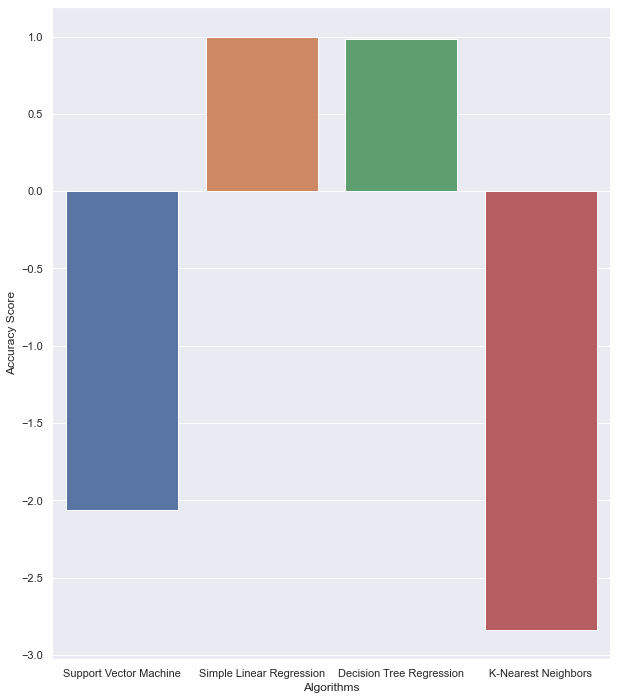

In [73]:
scores = [svr_rbf_confidence, reg_confidence, dtreg_confidence, knnreg_confidence]
algorithms = ["Support Vector Machine", "Simple Linear Regression", "Decision Tree Regression", "K-Nearest Neighbors"]
sns.set(rc={'figure.figsize':(10,12)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)